<a href="https://colab.research.google.com/github/lNamelessl/ML-Projects/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzip dataset
# !unzip /content/drive/MyDrive/datasets/ml-100k.zip

In [ ]:
import pandas as pd


In [ ]:
# Load ratings
ratings = pd.read_csv('/content/ml-100k/u.data', sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

In [ ]:
ratings.shape

(100000, 4)

In [ ]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
print(f"Number of unique users: {ratings['user_id'].nunique()}")
print(f"Number of unique movies: {ratings['movie_id'].nunique()}")

Number of unique users: 943
Number of unique movies: 1682


In [ ]:
# load movie titles and genres
movies = pd.read_csv('/content/ml-100k/u.item', sep="|", encoding="latin-1",
                     names=["movie_id", "title", "release_date", "video_release_date", "imdb_url", "unknown"] +
                           ["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
                            "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"],
                     usecols=list(range(24)))  # Include all 24 columns

In [ ]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# merge datasets
df = pd.merge(ratings, movies, on="movie_id")

In [ ]:
df.head()

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(100000, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   movie_id            100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   title               100000 non-null  object 
 5   release_date        99991 non-null   object 
 6   video_release_date  0 non-null       float64
 7   imdb_url            99987 non-null   object 
 8   unknown             100000 non-null  int64  
 9   Action              100000 non-null  int64  
 10  Adventure           100000 non-null  int64  
 11  Animation           100000 non-null  int64  
 12  Children's          100000 non-null  int64  
 13  Comedy              100000 non-null  int64  
 14  Crime               100000 non-null  int64  
 15  Documentary         100000 non-null

In [ ]:
df.describe()

,user_id,movie_id,rating,timestamp,video_release_date,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,1.000000e+05,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,330.798356,1.125674,5.343856e+06,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,1.000000,1.000000,8.747247e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

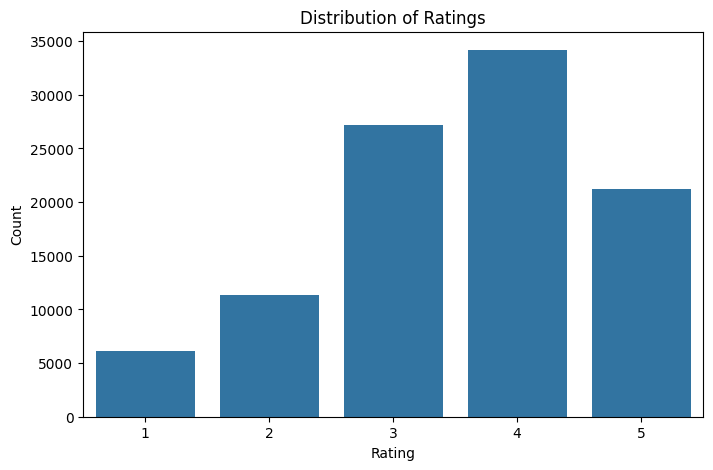

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=df)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

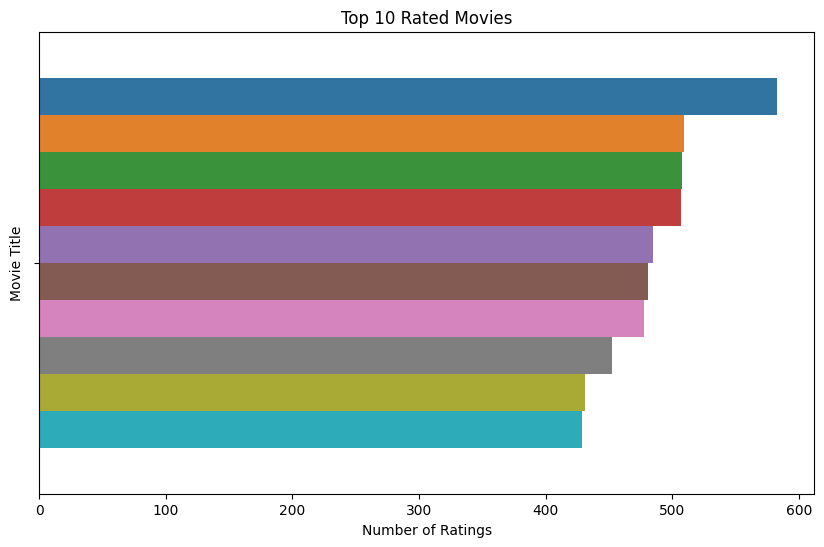

In [ ]:
top_rated = df['title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated.values, hue=top_rated.index, legend=False)
plt.title("Top 10 Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()

In [ ]:
print(top_rated)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


In [ ]:
avg_ratings = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(avg_ratings)

title
Aiqing wansui (1994)                                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Prefontaine (1997)                                   5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Santa with Muscles (1996)                            5.0
Name: rating, dtype: float64


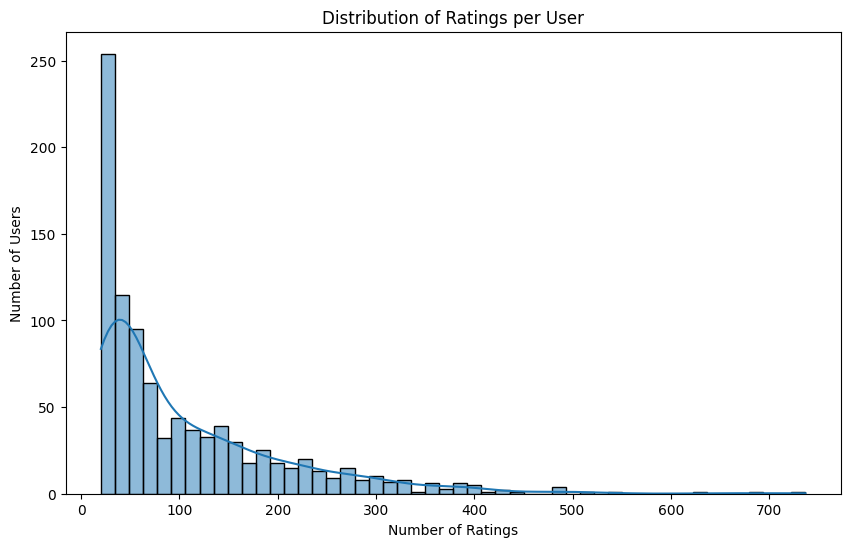

In [ ]:
ratings_per_user = df.groupby('user_id').size()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title("Distribution of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Group by movie and calculate average rating and count of ratings
movie_stats = ratings.groupby('movie_id').agg({'rating': ["count", "mean"]})


In [ ]:
movie_stats.columns = ["avg_rating", "num_ratings"]


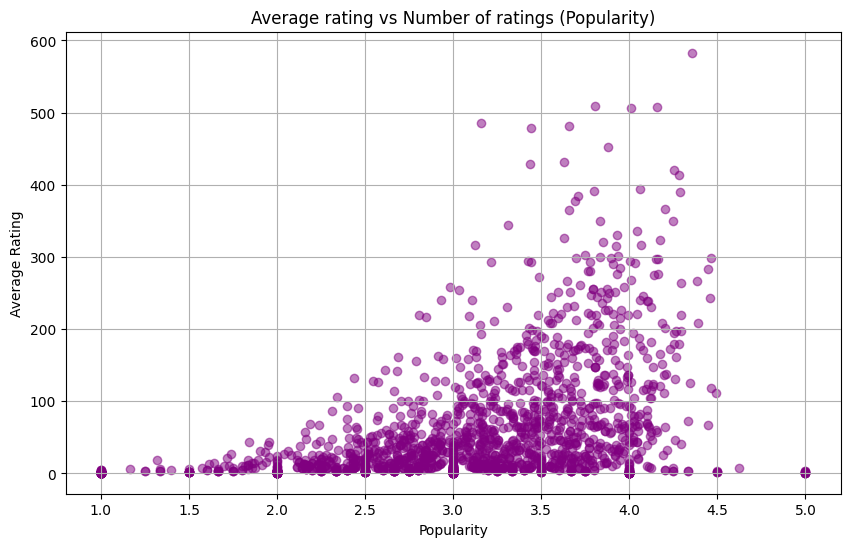

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(movie_stats["num_ratings"], movie_stats["avg_rating"], alpha=0.5, color='purple')
plt.title("Average rating vs Number of ratings (Popularity)")
plt.xlabel("Popularity")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
# create user-item-matrix
user_item_matrix = ratings.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

In [ ]:
# convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(user_item_matrix.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# use cosine similarity
model_knn = NearestNeighbors(metric="cosine", algorithm='brute')
model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
sample_user_index = 19


In [ ]:
distances, indices = model_knn.kneighbors(sparse_matrix[sample_user_index], n_neighbors=6)

In [ ]:
print(f"Recommendations for User ID: {sample_user_index}")
for i in range(1, len(distances[0])):
    print(f"User {indices[0][i]} | Distance: {distances[0][i]:.4f}")

Recommendations for User ID: 19
User 289 | Distance: 0.5703
User 896 | Distance: 0.6016
User 653 | Distance: 0.6076
User 43 | Distance: 0.6104
User 881 | Distance: 0.6141


In [ ]:
import numpy as np


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=20)
latent_matrix = svd.fit_transform(user_item_matrix)

In [ ]:
movies_features = svd.components_.T

In [ ]:
reconstructed_matrix = np.dot(latent_matrix, movies_features.T) # Transpose movies_features

In [ ]:
# convert to pd
predicted_ratings = pd.DataFrame(reconstructed_matrix, index=user_item_matrix.index,columns=user_item_matrix.columns )

In [ ]:
# predict user rating
user_id = 1
movie_id = 302
predicted_rating = predicted_ratings.loc[user_id, movie_id]
print(f"Predicted rating: {predicted_rating:.2f}")


Predicted rating: 1.04


In [ ]:
# predict user rating
def collab_recommend(user_id, n=5):
  user_ratings = predicted_ratings.loc[user_id].sort_values(ascending=False)
  # get movie ids of top N recommendations
  movie_ids = user_ratings.index[:n]
  return movies['title'][movies['movie_id'].isin(movie_ids)]


In [ ]:
collab_recommend(1)

,title
49,Star Wars (1977)
88,Blade Runner (1982)
99,Fargo (1996)
167,Monty Python and the Holy Grail (1974)
173,Raiders of the Lost Ark (1981)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
genre_data = movies[['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [ ]:
# calculate cosine similarity
similarity_matrix = cosine_similarity(genre_data)

In [ ]:
# create a reverse mapping from title to index
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [ ]:
def content_recommend(title, n=5):
    idx = indices[title]  # finds the index based on title
    sim_scores = list(enumerate(similarity_matrix[idx]))  # gets the similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1][0] if isinstance(x[1], (np.ndarray, pd.Series)) else x[1], reverse=True)  # sort them based on similarity score
    sim_scores = sim_scores[1:n + 1] # skips the first element and keeps the next ones within range
    # Extract only the movie indices from sim_scores
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]  # Use movie_indices for indexing

In [ ]:
content_recommend(title="Empire Strikes Back, The (1980)", n=5)


,title
49,Star Wars (1977)
180,Return of the Jedi (1983)
270,Starship Troopers (1997)
497,"African Queen, The (1951)"
630,"Crying Game, The (1992)"


In [ ]:
user_rated_movies = ratings[ratings['user_id'] == user_id]['movie_id'].tolist() # movies rated by user

In [ ]:
content_based_recs = {}
for movie_id in user_rated_movies:
    movie_title = movies[movies['movie_id'] == movie_id]['title'].values[0]  # Get movie title
    recs = content_recommend(movie_title, n=5)  # Get content-based recommendations
    content_based_recs[movie_id] = recs.tolist()  # Store recommendations for this movie


In [ ]:
content_based_df = pd.DataFrame.from_dict(content_based_recs, orient='index')
content_based_df = content_based_df.stack().reset_index(level=1, drop=True).to_frame('title')
content_based_df = content_based_df.merge(movies[['title', 'movie_id']], on='title', how='left')

Hybrid Filtering (Score Averaging)

In [ ]:
def hybrid_recommend(user_id, n=5, alpha=0.5):
    # 1. Get Collaborative Scores
    collab_scores = predicted_ratings.loc[user_id]

    # 2. Get Content-Based Scores
    # Create content_based_df using content_recommend for each movie the user has rated
    user_rated_movies = ratings[ratings['user_id'] == user_id]['movie_id'].tolist()  # Movies rated by the user
    content_based_recs = {}
    for movie_id in user_rated_movies:
        movie_title = movies[movies['movie_id'] == movie_id]['title'].values[0]  # Get movie title
        recs = content_recommend(movie_title, n=n)  # Get content-based recommendations
        content_based_recs[movie_id] = recs.tolist()  # Store recommendations for this movie

    # Create content_based_df (may need to adjust based on your data structure)
    content_based_df = pd.DataFrame.from_dict(content_based_recs, orient='index')
    content_based_df = content_based_df.stack().reset_index(level=1, drop=True).to_frame('title')
    content_based_df = content_based_df.merge(movies[['title', 'movie_id']], on='title', how='left')
    content_scores = content_based_df[content_based_df['movie_id'].isin(predicted_ratings.columns)]['movie_id'].value_counts(normalize=True)

    # 3. Normalize Scores
    collab_norm = (collab_scores - collab_scores.min()) / (collab_scores.max() - collab_scores.min())
    content_norm = (content_scores - content_scores.min()) / (content_scores.max() - content_scores.min())

    # 4. Combine Scores (Weighted Average)
    # Ensure both collab_norm and content_norm have the same index for proper alignment
    common_index = collab_norm.index.intersection(content_norm.index)
    collab_norm = collab_norm.loc[common_index]
    content_norm = content_norm.loc[common_index]

    hybrid_scores = alpha * collab_norm + (1 - alpha) * content_norm

    # 5. Get Top-N Recommendations
    top_n = hybrid_scores.sort_values(ascending=False).head(n).index

    return movies['title'][movies['movie_id'].isin(top_n)]

In [ ]:
hybrid_recommend(1)

,title
8,Dead Man Walking (1995)
14,Mr. Holland's Opus (1995)
18,Antonia's Line (1995)
29,Belle de jour (1967)
41,Clerks (1994)


In [ ]:
def compare_scores(user_id, top_n=10):
    collab = predicted_ratings.loc[user_id].sort_values(ascending=False).head(top_n)
    content = content_recommend(user_id, n=top_n)
    hybrid = hybrid_recommend(user_id, n=top_n)

    print("\n🎬 Collaborative Recommendations:")
    print(movies.set_index("movie_id").loc[collab.index]["title"])

    print("\n🎯 Content-Based Recommendations:")
    print(movies.set_index("movie_id").loc[content.index]["title"])

    print("\n🤝 Hybrid Recommendations:")
    print(hybrid)

In [ ]:
compare_scores(1)

In [ ]:
import pickle

In [ ]:
# save model
with open('predicted_ratings.pkl', 'wb') as f:
  pickle.dump(predicted_ratings, f)

In [ ]:
# Load everything
with open('predicted_ratings.pkl', 'rb') as f:
    predicted_ratings = pickle.load(f)

# Get recommendations
user_id = 42
print("🎉 Recommended Movies for User", user_id)
print(hybrid_recommend(user_id, n=5))
